In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
import sklearn as sk
import sklearn.discriminant_analysis as da
import sklearn.neighbors as knn
from IPython.display import Markdown, display
from sklearn.cross_validation import train_test_split

%matplotlib inline

In [2]:
df = pd.read_csv('listings.csv')

In [3]:
display(df.head())
df.columns

,id,scrape_id,last_scraped,name,picture_url,host_id,host_name,host_since,host_picture_url,street,...,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listing_count
0,1069266,20150101184336,2015-01-02,Stay like a real New Yorker!,https://a0.muscache.com/pictures/50276484/larg...,5867023,Michael,2013-04-10,https://a2.muscache.com/ic/users/5867023/profi...,"East 53rd Street, New York, NY 10022, United S...",...,2013-04-28,2014-12-17,86.0,9.0,7.0,9.0,9.0,10.0,9.0,1
1,1846722,20150101184336,2015-01-02,Apartment 20 Minutes Times Square,https://a1.muscache.com/pictures/35865039/larg...,2631556,Denise,2012-06-13,https://a2.muscache.com/ic/users/2631556/profi...,"West 155th Street, New York, NY, United States",...,2014-01-05,2014-12-29,85.0,8.0,8.0,9.0,8.0,7.0,8.0,2
2,2061725,20150101184336,2015-01-02,Option of 2 Beds w Private Bathroom,https://a2.muscache.com/pictures/50650147/larg...,4601412,Miao,2013-01-05,https://a0.muscache.com/ic/users/4601412/profi...,"Van Buren Street, Brooklyn, NY 11221, United S...",...,2014-02-04,2014-12-29,98.0,10.0,10.0,10.0,10.0,9.0,10.0,4
3,44974,20150101184336,2015-01-03,Charming Bright West Village Studio,https://a1.muscache.com/pictures/20489905/larg...,198425,Sara,2010-08-11,https://a0.muscache.com/ic/users/198425/profil...,"Greenwich Ave, New York, NY 10011, United States",...,2010-10-08,2014-10-30,96.0,10.0,9.0,10.0,10.0,10.0,9.0,1
4,4701675,20150101184336,2015-01-02,Charming Apartment in Chelsea,https://a2.muscache.com/pictures/60588955/larg...,22590025,Charles,2014-10-15,https://a2.muscache.com/ic/users/22590025/prof...,"West 22nd Street, New York, NY 10011, United S...",...,2014-12-08,2014-12-08,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1


Index([u'id', u'scrape_id', u'last_scraped', u'name', u'picture_url',
       u'host_id', u'host_name', u'host_since', u'host_picture_url', u'street',
       u'neighbourhood', u'neighbourhood_cleansed', u'city', u'state',
       u'zipcode', u'market', u'country', u'latitude', u'longitude',
       u'is_location_exact', u'property_type', u'room_type', u'accommodates',
       u'bathrooms', u'bedrooms', u'beds', u'bed_type', u'square_feet',
       u'price', u'weekly_price', u'monthly_price', u'guests_included',
       u'extra_people', u'minimum_nights', u'maximum_nights',
       u'calendar_updated', u'availability_30', u'availability_60',
       u'availability_90', u'availability_365', u'calendar_last_scraped',
       u'number_of_reviews', u'first_review', u'last_review',
       u'review_scores_rating', u'review_scores_accuracy',
       u'review_scores_cleanliness', u'review_scores_checkin',
       u'review_scores_communication', u'review_scores_location',
       u'review_scores_value', u'h

### Ensure data is fresh

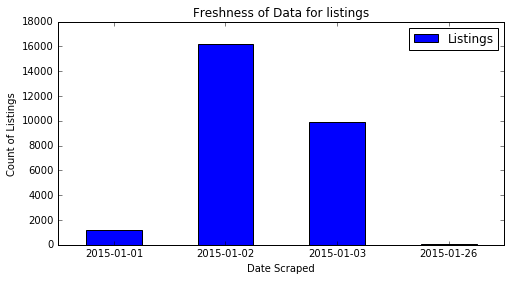

In [4]:
df_last = pd.DataFrame(df.last_scraped.value_counts()).reset_index().rename(columns={'index':'Date','last_scraped':'Listings'})

df_last.sort_values(by='Date', inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
df_last.plot(kind='bar', ax=ax)
ax.set_xticklabels(df_last['Date'], rotation='horizontal')
ax.set_xlabel('Date Scraped')
ax.set_ylabel('Count of Listings')
ax.set_title('Freshness of Data for listings')
Markdown('### Ensure data is fresh')

### Visualize Listing Count by Experience of Host

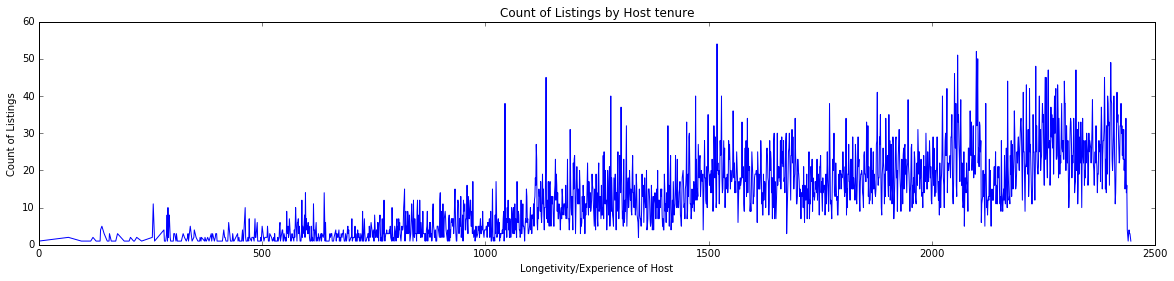

In [5]:
df['host_experience'] = (pd.to_datetime(df['host_since']) - min(pd.to_datetime(df['host_since']))).apply(lambda x: x.days)
df_last = pd.DataFrame(df.host_experience.value_counts()).reset_index().rename(columns={'index':'Longetivity', 'host_experience':'listings'})
df_last.sort_values(by='Longetivity', inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
ax.plot(df_last['Longetivity'],df_last['listings'])
ax.set_xlabel('Longetivity/Experience of Host')
ax.set_ylabel('Count of Listings')
ax.set_title('Count of Listings by Host tenure')
Markdown('### Visualize Listing Count by Experience of Host')

### Neighbourhood Popularity

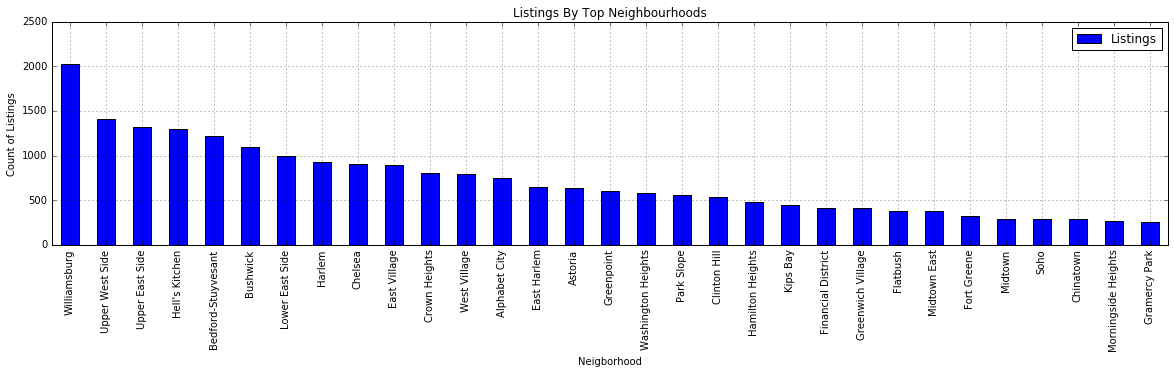

In [6]:
df_last = pd.DataFrame(df.neighbourhood_cleansed.value_counts()).reset_index().rename(columns={'index':'Neigbourhood','neighbourhood_cleansed':'Listings'})

df_last.sort_values(by='Listings', ascending=False, inplace=True)
df_last = df_last[df_last['Listings'] > 250]
fig, ax = plt.subplots(1, 1, figsize=(20, 4))
df_last.plot(kind='bar', ax=ax)
ax.set_xticklabels(df_last['Neigbourhood'])
ax.set_xlabel('Neigborhood')
ax.set_ylabel('Count of Listings')
ax.set_title('Listings By Top Neighbourhoods')
ax.grid()
Markdown('### Neighbourhood Popularity')


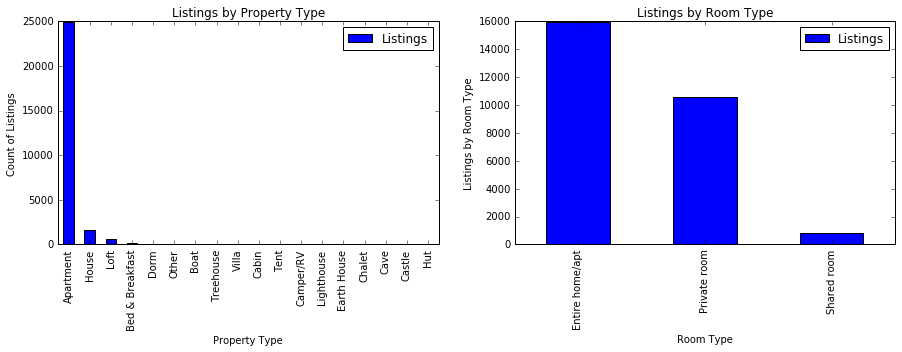

In [7]:
#property_type
df_last = pd.DataFrame(df.property_type.value_counts()).reset_index().rename(columns={'index':'property_type','property_type':'Listings'})

fig, (ax,ax1) = plt.subplots(1, 2, figsize=(15, 4))
df_last.plot(kind='bar', ax=ax)
ax.set_xticklabels(df_last['property_type'])
ax.set_xlabel('Property Type')
ax.set_ylabel('Count of Listings')
ax.set_title('Listings by Property Type')
Markdown('### Listings By Property / Room Type')

df_last = pd.DataFrame(df.room_type.value_counts()).reset_index().rename(columns={'index':'room_type','room_type':'Listings'})

df_last.plot(kind='bar', ax=ax1)
ax1.set_xticklabels(df_last['room_type'])
ax1.set_xlabel('Room Type')
ax1.set_ylabel('Listings by Room Type')
ax1.set_title('Listings by Room Type');


In [8]:
#df = df[['host_id', 'host_since','street','neighbourhood_cleansed','city','zipcode']]
#df.head()

#cols = df.columns; 

#for col in cols:
#    print df[col].value_counts()


#[['dummy']].size().reset_index().drop('dummy',axis=1)